# Doğrusal Regresyon Egzersizleri

50 adet Startup'ın araştırma ve geliştirmeye yönelik harcaması, yönetime yönelik harcaması, pazarlama harcaması, kazandıkları kar miktarı ve kuruldukları lokasyon bilgisi bulunmaktadır. Amaç kar miktarını tahmin etmektir. Bu bir sayısal tahmin problemidir ve bağımlı değişkenimiz "Profit".

Numpy, matplotlib.pyplot, pandas ve seaborn kütüphanelerini çekirdeğe dahil edelim.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Dizinde bulunan veri çerçevemizi startups değişkenine atayalım. startups değişkenini df değişkenine kopyalayarak kullanmaya başlayalım.

In [2]:
startups = pd.read_csv("50_Startups.csv")
df = startups.copy()

İlk 5 gözlemini yazdıralım.

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Veri çerçevesinin bilgilerini görüntüleyelim.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Kaç gözlem ve öznitelikten oluştuğunu görüntüleyelim.

In [5]:
df.shape

(50, 5)

Eksik verileri kontrol edelim.

In [6]:
df.isnull().sum()
#df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

Korelasyon matrisi çizdirelim.

In [7]:
corr = df.corr()
corr

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


Seaborn ile korelasyon matrisinin ısı haritasını çizdirelim.

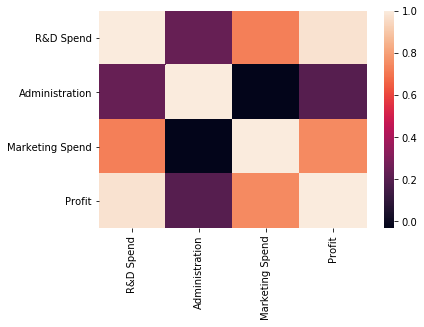

In [8]:
sns.heatmap(corr)

State ve Profit arasındaki korelasyonu daha iyi görebilmek için scatterplot çizdirelim.

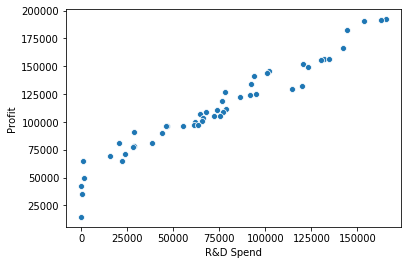

In [9]:
sns.scatterplot(x = "State", y = "Profit", data=df)

Sayısal değişkenlerin dağılımını görmek için df üzerinden histogram çizdirelim.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D59C8721C8>,
      dtype=object)

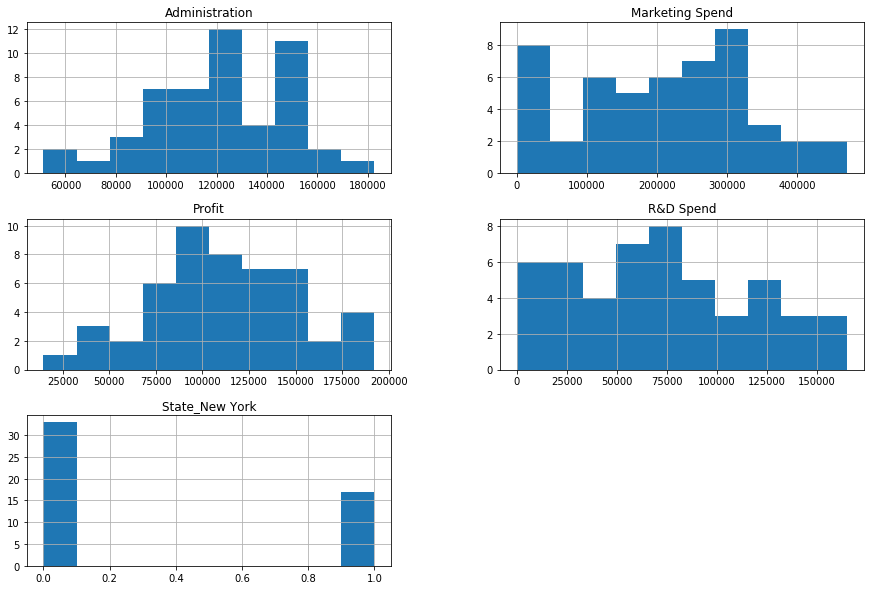

In [77]:
df.hist(figsize=(15,10))

Veri çerçevesinin temel istatistik değerlerini görüntüleyelim.

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


State'a ait benzersiz değerleri görüntüleyelim.

In [15]:
df["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

get_dummies yardımıyla State'a dair kategorik öznitelik çıkarımlarında bulunalım. Çünkü State'ların birbirine üstünlüğü yok, nominaller. Ordinal değil.

In [16]:
df["State"] = pd.Categorical(df["State"])

In [17]:
dfDummies = pd.get_dummies(df["State"],prefix = "State")
dfDummies

,State_California,State_Florida,State_New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [18]:
df = pd.concat([df,dfDummies],axis=1)

In [19]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


State özniteliğini silip dummy olarak yaratılan State'lardan da birisini hariç tutarak veri çerçevemizi güncelleyelim.

In [20]:
df.drop(["State","State_California","State_Florida"],axis=1 ,inplace= True)

In [21]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_New York
0,165349.20,136897.80,471784.10,192261.83,1
1,162597.70,151377.59,443898.53,191792.06,0
2,153441.51,101145.55,407934.54,191050.39,0
3,144372.41,118671.85,383199.62,182901.99,1
4,142107.34,91391.77,366168.42,166187.94,0


Veri çerçevemizi bağımlı ve bağımsız değişkenler olmak üzere bölütleyelim.

In [22]:
X = df.drop("Profit",axis=1)
y = df["Profit"]

Bağımlı ve bağımsız değişkenleri kontrol edelim.

In [23]:
print(X)

    R&D Spend  Administration  Marketing Spend  State_New York
0   165349.20       136897.80        471784.10               1
1   162597.70       151377.59        443898.53               0
2   153441.51       101145.55        407934.54               0
3   144372.41       118671.85        383199.62               1
4   142107.34        91391.77        366168.42               0
5   131876.90        99814.71        362861.36               1
6   134615.46       147198.87        127716.82               0
7   130298.13       145530.06        323876.68               0
8   120542.52       148718.95        311613.29               1
9   123334.88       108679.17        304981.62               0
10  101913.08       110594.11        229160.95               0
11  100671.96        91790.61        249744.55               0
12   93863.75       127320.38        249839.44               0
13   91992.39       135495.07        252664.93               0
14  119943.24       156547.42        256512.92         

In [24]:
print(y)

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64


Bu bağımlı ve bağımsız değişkenlerden train ve test olmak üzere 4 parça oluşturalım. Bunu yapmak için train_test_split kullanalım.

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20,random_state=0 )

4 parça değişkeni kontrol edelim.

In [26]:
X_train

,R&D Spend,Administration,Marketing Spend,State_New York
33,55493.95,103057.49,214634.81,0
35,46014.02,85047.44,205517.64,1
26,75328.87,144135.98,134050.07,0
34,46426.07,157693.92,210797.67,0
18,91749.16,114175.79,294919.57,0
7,130298.13,145530.06,323876.68,0
14,119943.24,156547.42,256512.92,0
45,1000.23,124153.04,1903.93,1
48,542.05,51743.15,0.00,1
29,65605.48,153032.06,107138.38,1


In [27]:
X_test

,R&D Spend,Administration,Marketing Spend,State_New York
28,66051.52,182645.56,118148.20,0
11,100671.96,91790.61,249744.55,0
10,101913.08,110594.11,229160.95,0
41,27892.92,84710.77,164470.71,0
2,153441.51,101145.55,407934.54,0
27,72107.60,127864.55,353183.81,1
38,20229.59,65947.93,185265.10,1
31,61136.38,152701.92,88218.23,1
22,73994.56,122782.75,303319.26,0
4,142107.34,91391.77,366168.42,0


In [28]:
y_train

33     96778.92
35     96479.51
26    105733.54
34     96712.80
18    124266.90
7     155752.60
14    132602.65
45     64926.08
48     35673.41
29    101004.64
15    129917.04
30     99937.59
32     97427.84
16    126992.93
42     71498.49
20    118474.03
43     69758.98
8     152211.77
13    134307.35
25    107404.34
5     156991.12
17    125370.37
40     78239.91
49     14681.40
1     191792.06
12    141585.52
37     89949.14
24    108552.04
6     156122.51
23    108733.99
36     90708.19
21    111313.02
19    122776.86
9     149759.96
39     81005.76
46     49490.75
3     182901.99
0     192261.83
47     42559.73
44     65200.33
Name: Profit, dtype: float64

In [29]:
y_test

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64

LinearRegression'u çekirdeğe dahil edip modeli inşa edelim.

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Modeli eğitmek için bağımlı bağımsız değişkenlerden oluşturulan eğitim verilerini verelim.

In [31]:
model = model.fit(X_train,y_train)
model.score(X_train, y_train)

0.9501020786438475

Modele daha önce görmediği bağımlı test değişkenini tahmin ettirelim. Bu tahmin değerlerimizi y_pred değişkenine atayalım.

In [32]:
y_pred = model.predict(X_test)
y_pred

array([103615.70496702, 132245.69745454, 133070.23906353,  72592.46097857,
       179075.96157198, 116014.33808117,  67853.79186124,  98837.47482909,
       114480.26282335, 168492.5864927 ])

Tahminleri ve gerçek değerleri bir veri çerçevesinde toplayıp üzerinde göz gezdirelim.

In [33]:
test = pd.DataFrame(X_test).copy()
test["Profit"] = y_test
test["Predicted_Profit"] = y_pred
test.head()

,R&D Spend,Administration,Marketing Spend,State_New York,Profit,Predicted_Profit
28,66051.52,182645.56,118148.20,0,103282.38,103615.704967
11,100671.96,91790.61,249744.55,0,144259.40,132245.697455
10,101913.08,110594.11,229160.95,0,146121.95,133070.239064
41,27892.92,84710.77,164470.71,0,77798.83,72592.460979
2,153441.51,101145.55,407934.54,0,191050.39,179075.961572


sklearn bünyesinde barınan metrics'i çekirdeğe dahil edelim ve MAE, MSE, RMSE değerlerini görüntüleyelim.

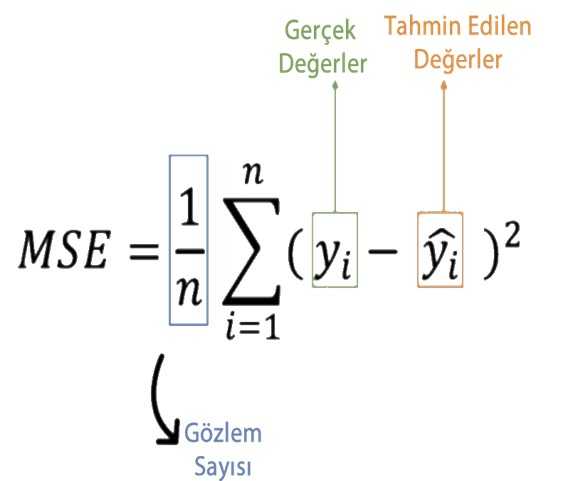

In [76]:
#MSE Değeri
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

80949594.9916443

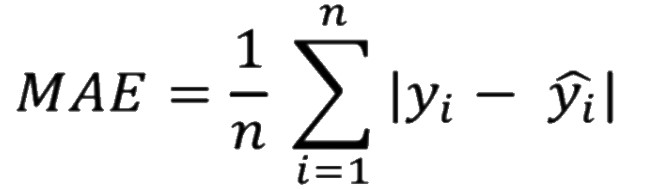

In [35]:
#MAE Değeri
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test["Profit"], test["Predicted_Profit"])

7474.7406263471885

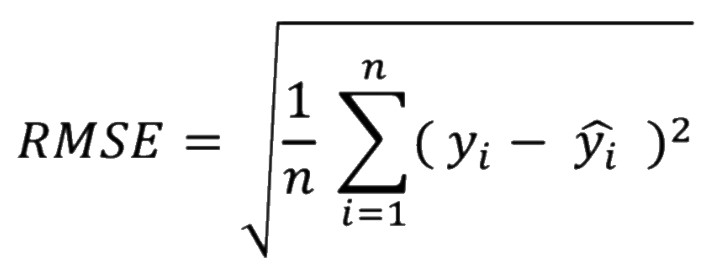

In [36]:
#RMSE Değeri
np.sqrt(mean_squared_error(test["Profit"], test["Predicted_Profit"]))

8997.199285980292

Modelin R Squared değerini eğitim verileri üzerinden yazdıralım.

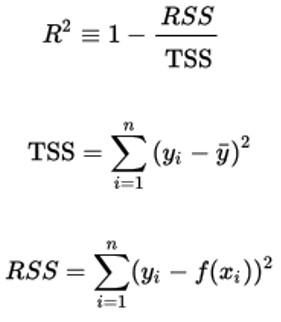

In [37]:
from sklearn.metrics import r2_score
r2_score(y_train, model.predict(X_train))

0.9501020786438475

Dileyenler statsmodel kullanarak hangi özniteliklerin model için %95 güvenilirlikle ne kadar anlamlı olup olmadığına da bakabilir. Modelde bazı feature selection işlemleri yaparak tekrardan eğitip yeni sonuçlar mukayese edilebilir.

In [38]:
#En Küçük Kareler Yöntemiyle p İstatistiklerinin Elde Edilmesi
import statsmodels.api as sm
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              918.8
Date:                Wed, 04 May 2022   Prob (F-statistic):                    3.11e-43
Time:                        17:29:12   Log-Likelihood:                         -545.42
No. Observations:                  50   AIC:                                      1099.
Df Residuals:                      46   BIC:                                      1106.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.7149      0.065     10.953      0.000       0.584       0.846
Administration      0.3196      0.033      9.734      0.000       0.253       0.386
Marketing Spend     0.0826      0.022      3.739      0.001       0.038       0.127
State_New York   3486.9078   4074.121      0.856      0.397   -4713.871    1.17e+04
==============================================================================
Omnibus:                        1.503   Durbin-Watson:                   1.316
Prob(Omnibus):                  0.472   Jarque-Bera (JB):                1.291
Skew:                          -0.224   Prob(JB):                        0.524
Kurtosis:                       2.352   Cond. No.                     5.82e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
model.pvalues

R&D Spend          2.081528e-14
Administration     9.530278e-13
Marketing Spend    5.099767e-04
State_New York     3.965074e-01
dtype: float64

## Geriye Doğru Adım Adım Model Seçme 

In [40]:
#Geriye Doğru Ekleme
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model2 = sm.OLS(y,X_1).fit()
    p = pd.Series(model2.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max) # listeden belirtilen indeksin silinmesi
    else:
        break

In [41]:
selected_features_BE = cols
print(selected_features_BE)

['R&D Spend']


## Özyineli Öznitelik Eliminasyonu

In [43]:
from sklearn.feature_selection import RFE # gerekli kütüphane çağrılır.

model3 = LinearRegression() #nesne oluşturulur.

rfe = RFE(model3) #Yapıcı RFE Modeli 

In [44]:
#RFE kullanılarak Veriyi Dönüştürme
X_rfe = rfe.fit_transform(X,y)

In [45]:
#Dönüştürülen Veriyi Modele Uygulama
model3.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True False False  True]
[1 3 2 1]


## Ridge Regresyon

In [46]:
from sklearn.linear_model import Ridge #Ridge Regresyonu için gerekli 
from sklearn.model_selection import cross_val_score # çapraz doğrulama için gerekli 

In [47]:
alpha_degerler = np.logspace(-4,0.1,100)
ridge_R = []
ridge_model = Ridge(normalize=True)

for alpha in alpha_degerler:
    ridge_model.alpha = alpha
    ridge_cv = cross_val_score(ridge_model,X,y,cv=5)
    ridge_R.append(np.mean(ridge_cv))

ind = ridge_R.index(max(ridge_R))
print("alpha değeri:" , {alpha_degerler[ind]})

alpha değeri: {0.0001}


## Korelasyona Göre Seçim 

In [48]:
startups = pd.read_csv("50_Startups.csv")
df = startups.copy()
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [49]:
df["State"] = pd.Categorical(df["State"])
dfDummies = pd.get_dummies(df["State"],prefix = "State")
df = pd.concat([df,dfDummies],axis=1)
df

,R&D Spend,Administration,Marketing Spend,State,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0
5,131876.90,99814.71,362861.36,New York,156991.12,0,0,1
6,134615.46,147198.87,127716.82,California,156122.51,1,0,0
7,130298.13,145530.06,323876.68,Florida,155752.60,0,1,0
8,120542.52,148718.95,311613.29,New York,152211.77,0,0,1
9,123334.88,108679.17,304981.62,California,149759.96,1,0,0


In [50]:
df.drop(["State","State_California","State_Florida"],axis=1 ,inplace= True)
df

,R&D Spend,Administration,Marketing Spend,Profit,State_New York
0,165349.20,136897.80,471784.10,192261.83,1
1,162597.70,151377.59,443898.53,191792.06,0
2,153441.51,101145.55,407934.54,191050.39,0
3,144372.41,118671.85,383199.62,182901.99,1
4,142107.34,91391.77,366168.42,166187.94,0
5,131876.90,99814.71,362861.36,156991.12,1
6,134615.46,147198.87,127716.82,156122.51,0
7,130298.13,145530.06,323876.68,155752.60,0
8,120542.52,148718.95,311613.29,152211.77,1
9,123334.88,108679.17,304981.62,149759.96,0


In [51]:
df2 = df.copy()
df2

,R&D Spend,Administration,Marketing Spend,Profit,State_New York
0,165349.20,136897.80,471784.10,192261.83,1
1,162597.70,151377.59,443898.53,191792.06,0
2,153441.51,101145.55,407934.54,191050.39,0
3,144372.41,118671.85,383199.62,182901.99,1
4,142107.34,91391.77,366168.42,166187.94,0
5,131876.90,99814.71,362861.36,156991.12,1
6,134615.46,147198.87,127716.82,156122.51,0
7,130298.13,145530.06,323876.68,155752.60,0
8,120542.52,148718.95,311613.29,152211.77,1
9,123334.88,108679.17,304981.62,149759.96,0


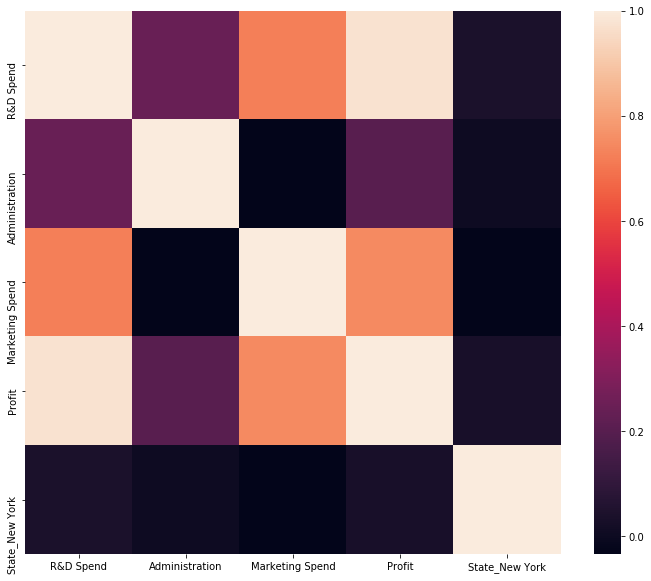

In [52]:
#Pearson Katsayısını Kullanma
plt.figure(figsize=(12,10))
corr = df2.corr()
sns.heatmap(corr)
plt.show()

In [53]:
#Hedef değerler ile Olan Korelasyon
cor_target = abs(corr["Profit"])
cor_target

R&D Spend          0.972900
Administration     0.200717
Marketing Spend    0.747766
Profit             1.000000
State_New York     0.031368
Name: Profit, dtype: float64

In [54]:
#Yüksek Korelasyona Sahip Hedeflerin Seçilmesi
relevant_features = cor_target[cor_target>0.5] # eşik değeri 0.5 belirlenirse
relevant_features

R&D Spend          0.972900
Marketing Spend    0.747766
Profit             1.000000
Name: Profit, dtype: float64

In [55]:
df2.drop(["Administration","State_New York"],axis=1,inplace=True)
df2

,R&D Spend,Marketing Spend,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94
5,131876.90,362861.36,156991.12
6,134615.46,127716.82,156122.51
7,130298.13,323876.68,155752.60
8,120542.52,311613.29,152211.77
9,123334.88,304981.62,149759.96


In [56]:
X_1 = df2.drop("Profit",axis=1)
X_1

,R&D Spend,Marketing Spend
0,165349.20,471784.10
1,162597.70,443898.53
2,153441.51,407934.54
3,144372.41,383199.62
4,142107.34,366168.42
5,131876.90,362861.36
6,134615.46,127716.82
7,130298.13,323876.68
8,120542.52,311613.29
9,123334.88,304981.62


In [57]:
y_1 = df2["Profit"]
y_1

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [58]:
#Veri Setinin Ayrılması
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1,y_1,test_size = 0.20,random_state=0)

In [59]:
X_train1

,R&D Spend,Marketing Spend
33,55493.95,214634.81
35,46014.02,205517.64
26,75328.87,134050.07
34,46426.07,210797.67
18,91749.16,294919.57
7,130298.13,323876.68
14,119943.24,256512.92
45,1000.23,1903.93
48,542.05,0.00
29,65605.48,107138.38


In [60]:
X_test1

,R&D Spend,Marketing Spend
28,66051.52,118148.20
11,100671.96,249744.55
10,101913.08,229160.95
41,27892.92,164470.71
2,153441.51,407934.54
27,72107.60,353183.81
38,20229.59,185265.10
31,61136.38,88218.23
22,73994.56,303319.26
4,142107.34,366168.42


In [61]:
y_train1

33     96778.92
35     96479.51
26    105733.54
34     96712.80
18    124266.90
7     155752.60
14    132602.65
45     64926.08
48     35673.41
29    101004.64
15    129917.04
30     99937.59
32     97427.84
16    126992.93
42     71498.49
20    118474.03
43     69758.98
8     152211.77
13    134307.35
25    107404.34
5     156991.12
17    125370.37
40     78239.91
49     14681.40
1     191792.06
12    141585.52
37     89949.14
24    108552.04
6     156122.51
23    108733.99
36     90708.19
21    111313.02
19    122776.86
9     149759.96
39     81005.76
46     49490.75
3     182901.99
0     192261.83
47     42559.73
44     65200.33
Name: Profit, dtype: float64

In [62]:
y_test1

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64

In [63]:
#tahminleyici nesnesi oluşturulur.
model1 = LinearRegression()

#Regresyon katsayıları bulunur.
model1 = model1.fit(X_train1,y_train1)

#Bir bağımsız değişkene bakarak bağımlı değişkeni hesaplama başarısı
model1.score(X_1,y_1)

0.9501405208709232

In [64]:
#Tahminleme yapılır.
y_pred1 = model1.predict(X_test1)
y_pred1

array([102284.64605183, 133873.92383812, 134182.1495165 ,  73701.1069363 ,
       180642.25299736, 114717.24903894,  68335.07575312,  97433.45922275,
       114580.92136452, 170343.31979498])

In [65]:
MSE1 = mean_squared_error(y_pred1,y_test1)
MSE1

67220275.37568124

In [66]:
MAE1 = mean_absolute_error(y_test1, y_pred1)
MAE1

6886.594588246512

In [67]:
RMSE1 = np.sqrt(mean_squared_error(y_test1, y_pred1))
RMSE1

8198.79719078849

In [68]:
R2_score1 = r2_score(y_test1, y_pred1)
R2_score1

0.9474386447268488

In [69]:
from sklearn.model_selection import cross_val_score, cross_val_predict
cross_val_score(model1, X_train1, y_train1, cv = 10, scoring = "r2").mean()

0.7035988889779243